# "2019 February One Day Holding Long Short Portfolio BackTest"
> "2019 February Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [2]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [3]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190201].loc[df_testp.Date<20190301].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [4]:
#hide
df_agg=df_testp[['Date','labelr1']].groupby(['Date']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
#hide_input
df_agg

,Date,labelr1,cumreturn1
0,20190201,0.113819,1.000000
1,20190204,1.653080,1.001138
2,20190205,11.670217,1.017688
3,20190206,1.745168,1.136454
4,20190207,-8.441647,1.156287
5,20190208,103.554708,1.058678
6,20190211,-4.005027,2.154988
7,20190212,-21.602569,2.068680
8,20190213,-6.877610,1.621792
9,20190214,37.601123,1.510252


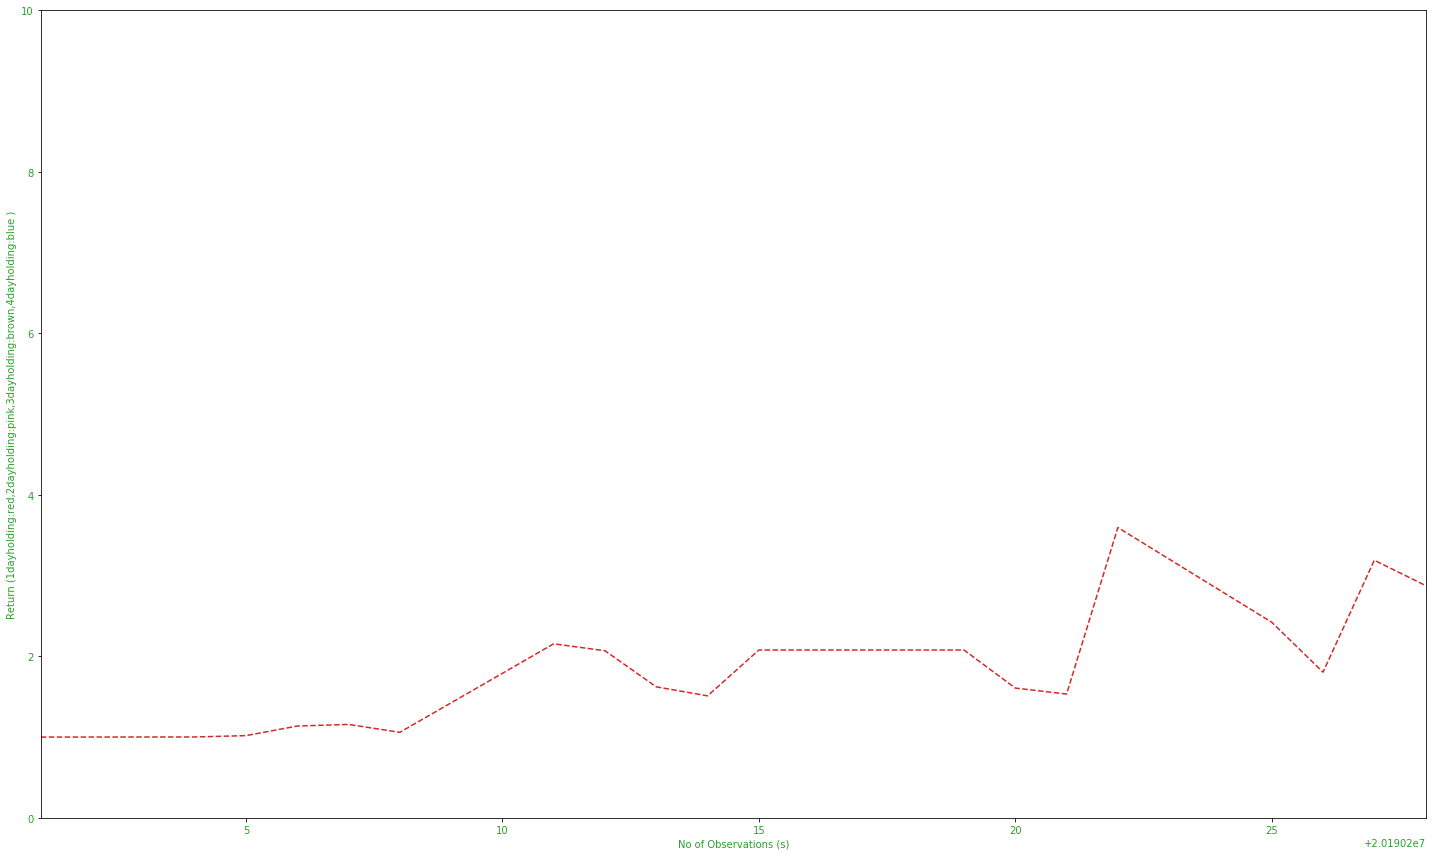

In [6]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [7]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20190201,1.0,0.113819,1.000000
1,20190204,1.0,1.653080,1.001138
2,20190205,1.0,11.670217,1.017688
3,20190206,1.0,-1.588165,1.136454
4,20190207,1.0,3.297230,1.118405
5,20190208,1.0,103.554708,1.155282
6,20190211,1.0,-4.005027,2.351631
7,20190212,1.0,-21.602569,2.257447
8,20190213,1.0,-6.877610,1.769781
9,20190214,1.0,33.469328,1.648062


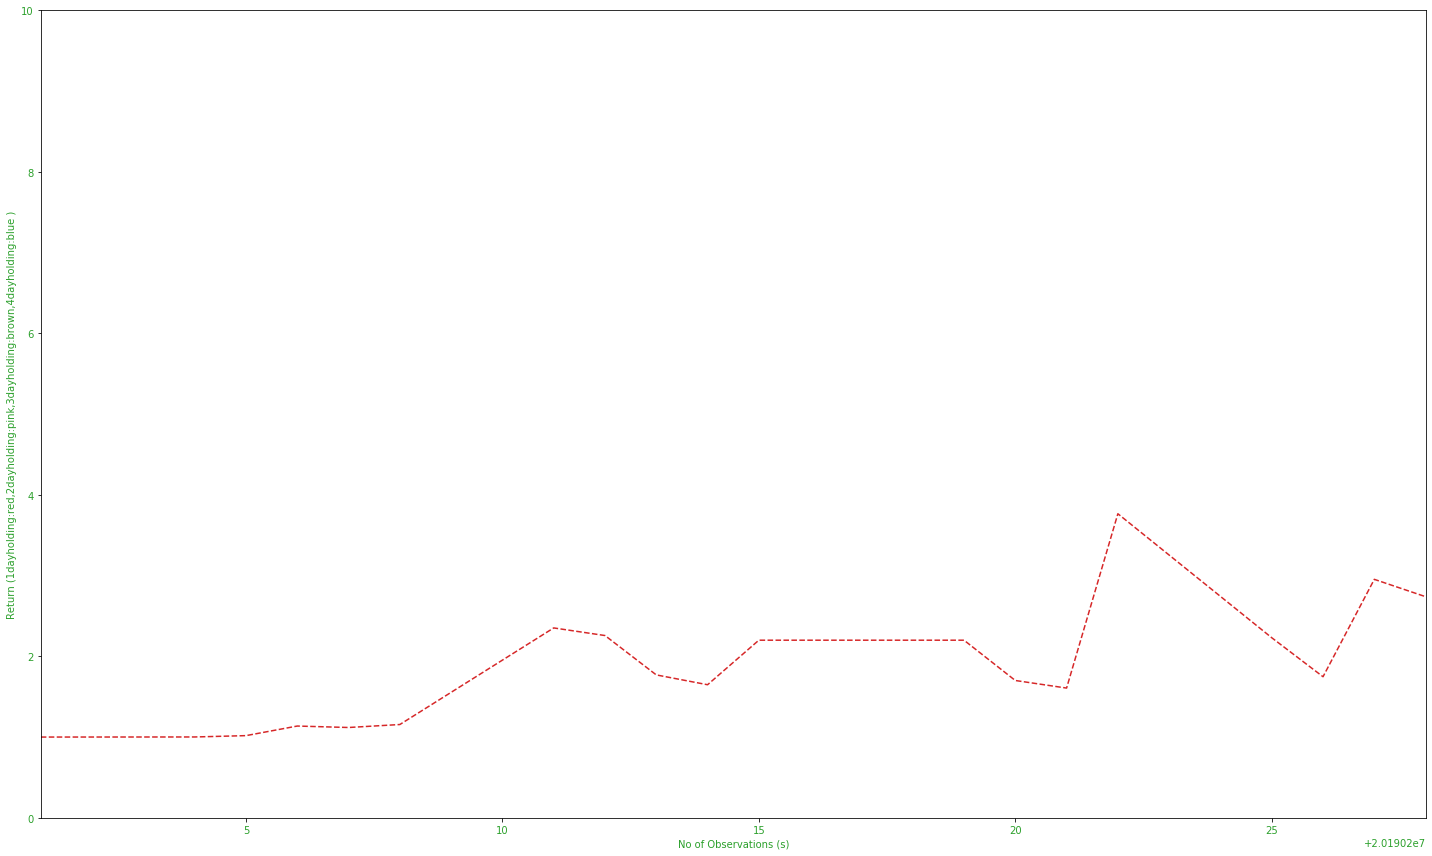

In [9]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [10]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20190205,-1.0,0.000000,1.000000
1,20190206,-1.0,3.333333,1.000000
2,20190207,-1.0,-11.738877,1.033333
3,20190214,-1.0,4.131795,0.912032
4,20190215,-1.0,0.000000,0.949715
5,20190220,-1.0,0.900901,0.949715
6,20190221,-1.0,0.222717,0.958271
7,20190222,-1.0,8.148148,0.960405
8,20190225,-1.0,-3.862301,1.038660
9,20190226,-1.0,7.812577,0.998544


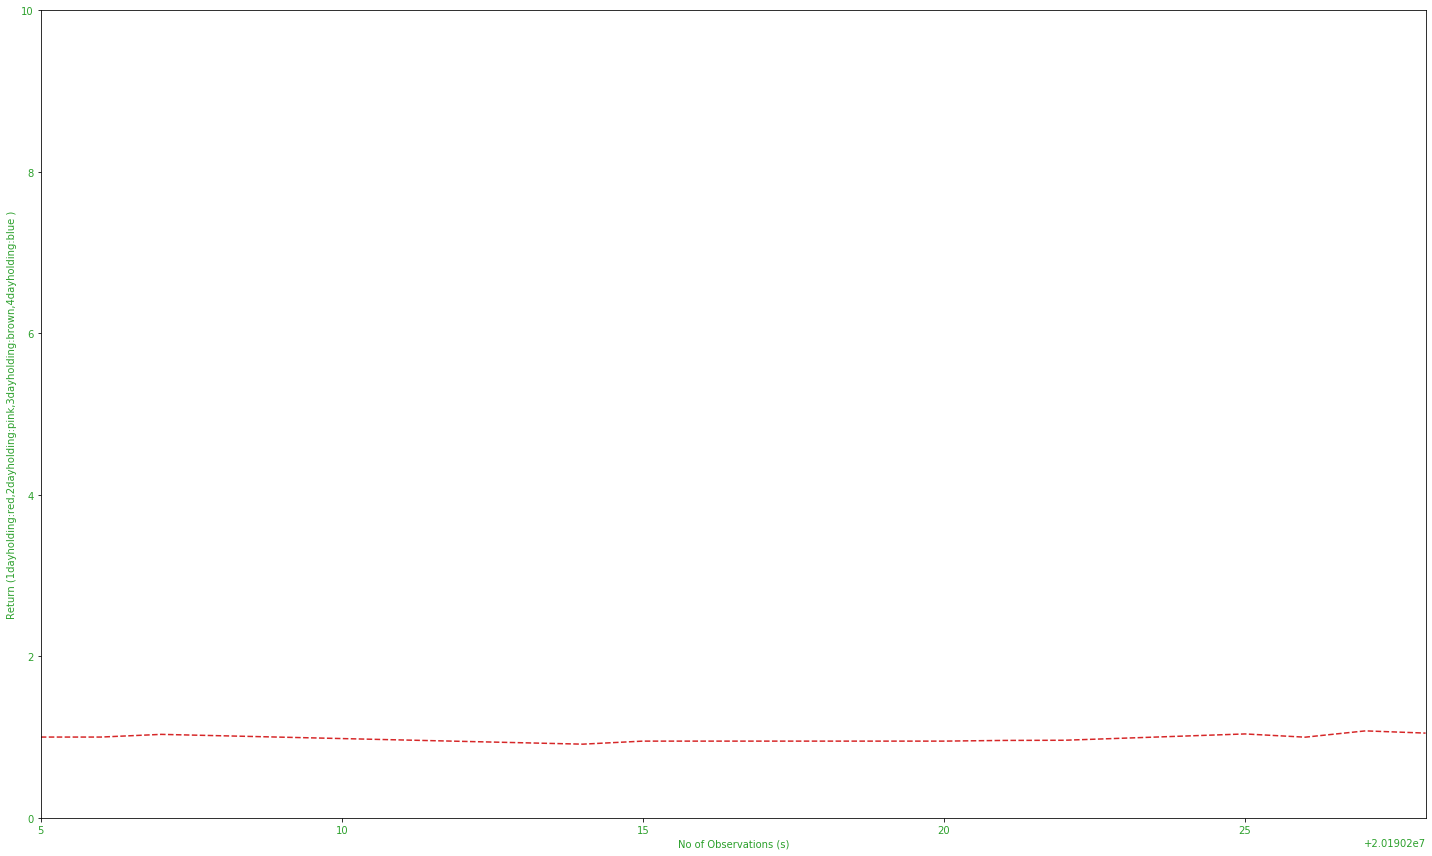

In [12]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()